<a href="https://colab.research.google.com/github/kelaskodingpelitabangsa/Implementasi-Fuzzy-Logic-Prediksi-Suhu-Tanah-berdasarkan-Suhu-Udara-dan-Kedalaman/blob/main/Implementasi_Fuzzy_Logic_Prediksi_Suhu_Tanah_berdasarkan_Suhu_Udara_dan_Kedalaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install scikit-fuzzy
! pip install scikit-fuzzy

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [6]:
# --- 1. DEFINISI VARIABEL INPUT DAN OUTPUT (UNIVERSE) ---
# Berdasarkan jurnal, Input: Suhu Udara (T_Air) dan Kedalaman (Depth)
# Output: Suhu Tanah (T_Soil)

# Rentang Suhu Udara (misalnya, dari -10°C sampai 45°C)
air_temp = ctrl.Antecedent(np.arange(-10, 46, 1), 'air_temp')
# Rentang Kedalaman (misalnya, dari 0 cm sampai 120 cm)
depth = ctrl.Antecedent(np.arange(0, 121, 1), 'depth')
# Rentang Suhu Tanah Output (misalnya, dari 0°C sampai 35°C)
soil_temp = ctrl.Consequent(np.arange(0, 36, 1), 'soil_temp')

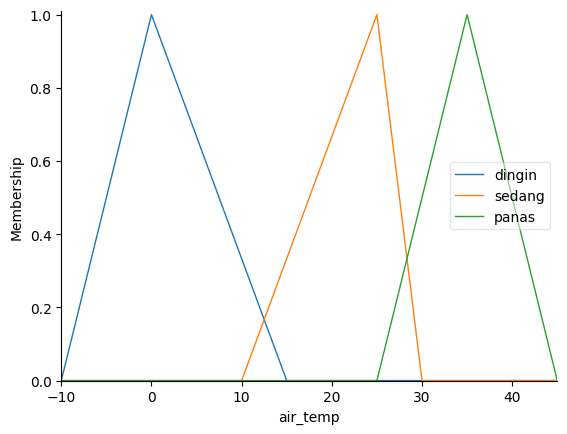

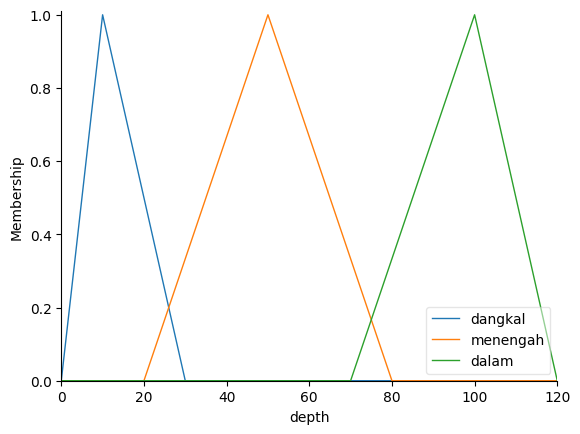

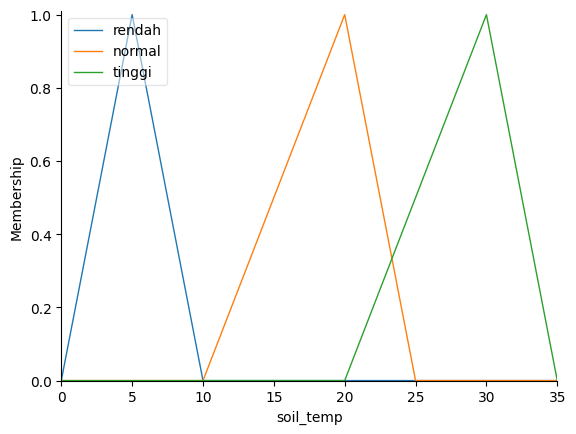

In [15]:
# --- 2. DEFINISI FUNGSI KEANGGOTAAN (FUZZIFIKASI) ---

# Fungsi Keanggotaan untuk Suhu Udara
air_temp['dingin'] = fuzz.trimf(air_temp.universe, [-10, 0, 15])
air_temp['sedang'] = fuzz.trimf(air_temp.universe, [10, 25, 30])
air_temp['panas'] = fuzz.trimf(air_temp.universe, [25, 35, 45])

# Fungsi Keanggotaan untuk Kedalaman
# Kita asumsikan kedalaman dibagi menjadi Dangkal, Menengah, dan Dalam
depth['dangkal'] = fuzz.trimf(depth.universe, [0, 10, 30])
depth['menengah'] = fuzz.trimf(depth.universe, [20, 50, 80])
depth['dalam'] = fuzz.trimf(depth.universe, [70, 100, 120])

# Fungsi Keanggotaan untuk Suhu Tanah (Output)
soil_temp['rendah'] = fuzz.trimf(soil_temp.universe, [0, 5, 10])
soil_temp['normal'] = fuzz.trimf(soil_temp.universe, [10, 20, 25])
soil_temp['tinggi'] = fuzz.trimf(soil_temp.universe, [20, 30, 35])

# Opsional: Melihat visualisasi fungsi keanggotaan (Anda bisa hapus komentar ini)
air_temp.view()
depth.view()
soil_temp.view()

In [17]:
# --- 3. DEFINISI ATURAN INFERENSI (LOGIKA FISIK) ---
# Berdasarkan logika fisik:
# 1. Suhu Udara Dingin -> Suhu Tanah Rendah
# 2. Kedalaman Dangkal lebih dipengaruhi Suhu Udara daripada Kedalaman Dalam

rule1 = ctrl.Rule(air_temp['dingin'] & depth['dangkal'], soil_temp['rendah'])
rule2 = ctrl.Rule(air_temp['dingin'] & depth['menengah'], soil_temp['rendah'])
rule3 = ctrl.Rule(air_temp['dingin'] & depth['dalam'], soil_temp['rendah'])

rule4 = ctrl.Rule(air_temp['sedang'] & depth['dangkal'], soil_temp['normal'])
rule5 = ctrl.Rule(air_temp['sedang'] & depth['menengah'], soil_temp['normal'])
rule6 = ctrl.Rule(air_temp['sedang'] & depth['dalam'], soil_temp['normal']) # Suhu dalam cenderung stabil

rule7 = ctrl.Rule(air_temp['panas'] & depth['dangkal'], soil_temp['tinggi'])
rule8 = ctrl.Rule(air_temp['panas'] & depth['menengah'], soil_temp['normal'])
rule9 = ctrl.Rule(air_temp['panas'] & depth['dalam'], soil_temp['rendah']) # Suhu panas tdk terlalu m'pengaruhi suhu dalam

In [18]:
# --- 4. PEMBUATAN SISTEM KONTROL DAN SIMULASI ---

# Inisialisasi Sistem Kontrol
soil_temp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
# Inisialisasi Simulasi
soil_temp_sim = ctrl.ControlSystemSimulation(soil_temp_ctrl)

In [10]:
# --- 5. INPUT DATA (PENGUJIAN KASUS) ---
# Contoh Kasus: Hari yang Sangat Panas (35°C) pada Kedalaman Dangkal (5 cm)
print("--- Input Data ---")
input_air_temp = 35  # Suhu Udara 35°C
input_depth = 5      # Kedalaman 5 cm
print(f"Suhu Udara: {input_air_temp}°C")
print(f"Kedalaman: {input_depth} cm")

soil_temp_sim.input['air_temp'] = input_air_temp
soil_temp_sim.input['depth'] = input_depth

--- Input Data ---
Suhu Udara: 35°C
Kedalaman: 5 cm



--- Hasil Prediksi ---
Prediksi Suhu Tanah: 5.00°C


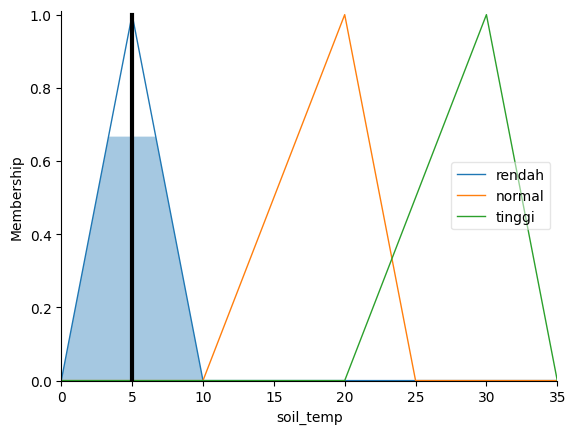

In [19]:
# --- 6. PERHITUNGAN DAN DEFUZZIFIKASI ---

# Komputasi hasil (Inferensi dan Defuzzifikasi)
try:
    soil_temp_sim.compute()

    # Hasil Defuzzifikasi (menggunakan metode Centroid secara default)
    predicted_soil_temp = soil_temp_sim.output['soil_temp']

    print("\n--- Hasil Prediksi ---")
    print(f"Prediksi Suhu Tanah: {predicted_soil_temp:.2f}°C")

    # Melihat hasil Defuzzifikasi
    soil_temp.view(sim=soil_temp_sim)

except Exception as e:
    print(f"\nTerjadi kesalahan saat komputasi: {e}")


--- Input Data Kasus 2 ---
Suhu Udara: 5°C
Kedalaman: 100 cm

--- Hasil Prediksi Kasus 2 ---
Prediksi Suhu Tanah: 5.00°C


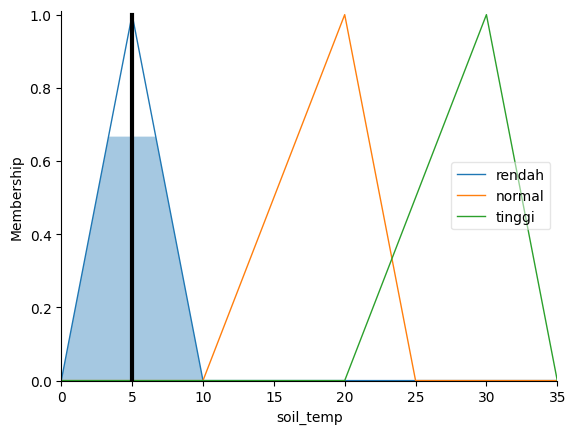

In [21]:
# --- Contoh Kasus 2: Hari Dingin pada Kedalaman Dalam ---
print("\n--- Input Data Kasus 2 ---")
input_air_temp_2 = 5
input_depth_2 = 100
print(f"Suhu Udara: {input_air_temp_2}°C")
print(f"Kedalaman: {input_depth_2} cm")

soil_temp_sim_2 = ctrl.ControlSystemSimulation(soil_temp_ctrl) # Sim baru untuk kasus 2
soil_temp_sim_2.input['air_temp'] = input_air_temp_2
soil_temp_sim_2.input['depth'] = input_depth_2

try:
    soil_temp_sim_2.compute()
    predicted_soil_temp_2 = soil_temp_sim_2.output['soil_temp']

    print("\n--- Hasil Prediksi Kasus 2 ---")
    print(f"Prediksi Suhu Tanah: {predicted_soil_temp_2:.2f}°C")

    # Tampilkan plot untuk Kasus 2
    # Menampilkan plot defuzzifikasi untuk kasus 2
    soil_temp.view(sim=soil_temp_sim_2)

except Exception as e:
    print(f"\nTerjadi kesalahan saat komputasi: {e}")

# Tampilkan semua plot yang telah dipanggil sebelumnya
plt.show()